| by : Giovano Aditya Graha|
| --- |

---
$$CAPSTONE\ PROJECT\ MODULE\ 3$$

$$Data\ Analysis$$
$$-\ and\ -$$
$$Machine\ Learning$$
---

---
# **INTRODUCTION**

### Data Source:
[Customer Lifetime Value Dataset](https://drive.google.com/file/d/1pYhQb2WcbwLAaMF4FPIEJSM34O-1A4v8/view) 

### Contents:

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing & EDA
4. Modeling & Tuning
5. Conclusion
6. Recommendation
7. Save and Deployment Model

---
# **BUSINESS PROBLEM UNDERSTANDING**

### Context

There are many factors that can affect the success of a business. Customers or customers are one of the main factors that determine the success of the company. Therefore, it is not surprising to find a metric used to measure customer value to a company. One of them is *Customer Lifetime Value* (CLV). This calculation is often used to measure customer value. Translated literally, CLV means customer's age. What is meant by the age of the customer age here is not intended to be seen from the year of birth, but from the time span used by your company's products or services.

*Customer Lifetime Value* is one of the indicators used to determine the customer value of a company. This metric is considered accurate so it is widely used by companies in calculating the value of their customers. In simple terms, CLV is a prediction of the total value of revenue you can get from that customer.

The *Customer Lifetime Value* dataset of this project is the implementation of a company engaged in insurance, namely PT. X.

### Problem Statment

As digital adoption accelerates across industries, successful platform-based companies outside of insurance are already using CLV metrology to drive growth and enhance their business valuation. Companies like PT.X need to change their mindset to focus on Customer Lifetime Value (CLV) to maintain a profitable business.

One of the biggest challenges for insurance companies is solving the problem of being able to have a profitable business model for the company considering the way insurance works is that the insured party pays a premium to the insurance company and the insurance company is obliged to provide benefits to the insured party once a claim is occured.

CLV can be applied in insurance to maximize the value that each customer provides to the business to find out how influential the customer is to the company's profitability and is a valuable model to be studied by insurance companies, especially when companies want to segment customers.

### Goals

Based on these problems, both PT. X or other insurance companies certainly need to have a tool that can predict and determine the *Customer Lifetime Value* of the prospective customer or prospective insured. The existence of differences in various features can increase the accuracy of CLV predictions which can help companies to assess each customer who will bring profit and provide other policies or benefits that can be provided based on the predicted CLV.

### Analytic Approach

So, what we need to do is analyze the data to be able to find patterns of existing features and differentiate one customer from another.

Next, we will build a regression model that will help PT. X to be able to provide a predictive tool *Customer Lifetime Value* which will be useful for companies in determining how important a customer is to the company's profitability.

### Metric Evaluation

The evaluation metrics that will be used are *RMSE*, *MAE*, and *MAPE*, where *RMSE* is the mean value of the square root of the error, *MAE* is the average absolute value of the error, while *MAPE* is the average percentage error generated by the regression model. The smaller the resulting *RMSE*, *MAE*, and *MAPE* values, it means that the model is more accurate in predicting CLV according to the limitations of the features used.

- RMSE    : RMSE refers to Root MSE. RMSE gives more importance to the highest residuals, hence it is more sensitive to outliers whereas on the other hand MAE is more robust to outliers. RMSE and MSE works on the principle of averaging the errors while MAE calculation is based on the median of the residual.

- MAE     : This gives less weight to outliers, which is not sensitive to outliers.
- MAPE    : Similar to MAE, but normalized by true observation. Downside is when true obs is zero, this metric will be problematic.

In addition, we can also use the value of *R-squared* or *adj. R-squared* if the model that will be selected as the final model is a linear model. The *R-squared* value is used to determine how well the model can represent the overall variance of the data. The closer to 1, the more fit the model is to the observation data. However, this metric is not valid for non-linear or non-parametric models.

> For your reference, [Why Customer Lifetime Value is the key metric every digital business needs to focus on, and how to effectively adopt it in insurance](https://www.the-digital-insurer.com/cif-why-customer-lifetime-value-is-the-key-metric-every-digital-business-needs-to-focus-on-and-how-to-effectively-adopt-it-in-insurance/)

---
# **DATA UNDERSTANDING**

### Features Information

| **FEATURES**          | **DESCRIPTION** |
| ---                   | --- |
| Vehicle Class         | Class of Vehicle Owned |
| Coverage              | Coverage or Protection Class |
| Renew Offer Type      | Types of Updates Offered |
| EmploymentStatus      | Current Job Status |
| Marital Status        | Status of marriage |
| Education             | Last Education Status |
| Number of Policies    | Number of Policies Owned |
| Monthly Premium Auto  | Premium Auto that billed Monthly (Constant) |
| Total Claim Amount    | Total Benefit when Claim is Occured |
| Income                | Earnings per year in USD |


### Target Information

Customer Lifetime Value : An indicator of how important the customer is to the company.

---
# **LIBRARIES**

In [578]:
# Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# ML Models
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.encoding import CountFrequencyEncoder # CountFrequencyEncoder

# Evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Model Deployment
import pickle

---
# **FUNCTIONS**

In [579]:
# -------------------------------------------------------------------------------------------
# 1. Outlier(s)
def outlier(a):
    ## q
    q1 = a.describe()['25%']
    q2 = a.describe()['50%']
    q3 = a.describe()['75%']
    ## IQR
    iqr = q3 - q1
    ## Outliers
    min_IQR = q1 - 1.5 * iqr
    max_IQR = q3 + 1.5 * iqr
    low_out = []
    high_out = []
    for i in a:
        if (i < min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            high_out.append(i)
    print(a.name)
    print('------------------------')
    ## Boundaries
    print('Lower Boundary \t: ', min_IQR)
    print('Upper Boundary \t: ', max_IQR)
    print()
    ## Count of Outlier(s)
    print('Count of Low Outlier(s) \t: ', len(low_out))
    print('Count of High Outlier(s) \t: ', len(high_out))
    print()
    ## Outliers List
    print('Low Outlier(s) List \t: ', low_out)
    print('High Outlier(s) List \t: ', high_out)

# -------------------------------------------------------------------------------------------
# 2. Normality Testing - DAP

def normal(variabel):
    stat, pvalue = stats.normaltest(variabel)

    print(f'''
    H0 : {variabel.name} is a normal distribution.
    Ha : {variabel.name} is not a normal distribution.
    ''')

    if pvalue <= 0.05:
        print(f'pvalue {variabel.name} = {pvalue:.10f}. Reject Ho. We do not assume {variabel.name} is a normal distribution.')
    else:
        print(f'pvalue {variabel.name} = {pvalue:.10f}. Failed to reject Ho. We assume {variabel.name} is a normal distribution.')

# -------------------------------------------------------------------------------------------
# 3. Correlation - Spearman Method

def corr_spearman(c):
    plt.figure(figsize = (8,6))
    mask_ = np.zeros_like(c.corr(method='spearman'))
    mask_[np.triu_indices_from(mask_)] = True
    sns.heatmap(c.corr(method='spearman'), mask = mask_, annot=True, cmap = 'RdYlGn')
    plt.title('Correlation Heatmap', size = 16)
    plt.show()

# -------------------------------------------------------------------------------------------
# 4. Calculating VIF

def calc_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = np.where(vif['VIF'] < 4, 'Yes', 'No') 
    return (vif) 

# -------------------------------------------------------------------------------------------


---
# **DATA INFORMATION**

## 1. IMPORT DATA

In [580]:
# Load Dataset
df = pd.read_csv('data_customer_lifetime_value.csv')

In [581]:
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


## 2. GENERAL INFORMATION

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [583]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


From the overall data description, it can be seen that there are significant data gaps (Outliers) in *Customer Lifetime Value*. Data engineering will be carried out by selecting the appropriate range to reduce bias from the later model results.

## 3. DATA CLEANSING

### a. Duplicated Data

In [584]:
df.duplicated().sum()

618

There are 618 data that can bias our model. So it is better to drop duplicate data (exact match) to produce a better model.

In [585]:
df = df.drop_duplicates().reset_index().drop(columns='index')

### b. Missing Value

In [586]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

There is no missing value (*NaN*) on the dataset. But we should explore further on each features to make sure there is no anomaly data.

## 4. FEATURES

### - Vehicle Class

In [587]:
df['Vehicle Class'].value_counts()

Four-Door Car    2565
Two-Door Car     1059
SUV               963
Sports Car        262
Luxury SUV        101
Luxury Car        101
Name: Vehicle Class, dtype: int64

| One Hot Encoding will be applied. |
| --- |

### - Coverage

In [588]:
df['Coverage'].value_counts()

Basic       3100
Extended    1517
Premium      434
Name: Coverage, dtype: int64

| One Hot Encoding will be applied. |
| --- |

### - Renew Offer Type

In [589]:
df['Renew Offer Type'].value_counts()

Offer1    2019
Offer2    1505
Offer3     885
Offer4     642
Name: Renew Offer Type, dtype: int64

| One Hot Encoding will be applied. |
| --- |

### - EmploymentStatus

In [590]:
df['EmploymentStatus'].value_counts()

Employed         3187
Unemployed       1332
Medical Leave     232
Disabled          216
Retired            84
Name: EmploymentStatus, dtype: int64

| One Hot Encoding will be applied. |
| --- |

### - Marital Status

In [591]:
df['Marital Status'].value_counts()

Married     2986
Single      1374
Divorced     691
Name: Marital Status, dtype: int64

| One Hot Encoding will be applied. |
| --- |

### - Education

In [592]:
df['Education'].value_counts()

Bachelor                1529
College                 1474
High School or Below    1450
Master                   397
Doctor                   201
Name: Education, dtype: int64

| Ordinary Encoding will be applied. |
| --- |

### - Number of Policies

In [593]:
df['Number of Policies'].unique()

array([2., 6., 1., 8., 5., 3., 7., 4., 9.])

| Robust Scalling will be applied. |
| --- |

### - Monthly Premium Auto

In [594]:
df['Monthly Premium Auto'].unique()

array([ 90.,  62., 116., 107., 101.,  66.,  65., 117.,  78.,  63.,  70.,
        71.,  61.,  64., 129., 100.,  68., 126.,  95., 128.,  84., 125.,
        98.,  97., 121., 192.,  69.,  83.,  72.,  67., 103.,  74.,  89.,
        86., 110., 124.,  73., 191., 122., 133., 165., 127., 144., 114.,
       194., 118., 111., 138., 119.,  76.,  80., 154., 189., 130., 109.,
       161.,  88.,  93., 113.,  87., 136., 106.,  99., 105.,  82.,  96.,
       159., 181., 146., 115., 187., 108., 209., 102., 104.,  77.,  79.,
       283., 150.,  92.,  91., 180., 131., 112., 184., 137., 185.,  94.,
       198., 135., 140., 132., 139.,  85., 123., 214., 201., 155., 193.,
        81., 223., 188., 134., 153., 147., 202., 196., 167., 175., 199.,
       183., 217., 247., 287., 176., 271., 172., 152., 204., 157., 231.,
       143., 203., 285., 156., 249., 158., 197., 190., 186., 229., 256.,
       238., 173., 222., 182., 239., 141., 245., 178., 168., 240., 248.,
       210., 171., 207., 213., 230., 215., 179., 14

In [595]:
normal(df['Monthly Premium Auto'])


    H0 : Monthly Premium Auto is a normal distribution.
    Ha : Monthly Premium Auto is not a normal distribution.
    
pvalue Monthly Premium Auto = 0.0000000000. Reject Ho. We do not assume Monthly Premium Auto is a normal distribution.


| Robust Scalling will be applied. |
| --- |

In [596]:
outlier(df['Monthly Premium Auto'])

Monthly Premium Auto
------------------------
Lower Boundary 	:  6.5
Upper Boundary 	:  170.5

Count of Low Outlier(s) 	:  0
Count of High Outlier(s) 	:  252

Low Outlier(s) List 	:  []
High Outlier(s) List 	:  [192.0, 191.0, 194.0, 194.0, 189.0, 181.0, 187.0, 209.0, 283.0, 191.0, 187.0, 180.0, 184.0, 185.0, 198.0, 214.0, 201.0, 193.0, 223.0, 188.0, 201.0, 181.0, 202.0, 196.0, 189.0, 188.0, 175.0, 199.0, 183.0, 192.0, 184.0, 217.0, 247.0, 181.0, 287.0, 176.0, 271.0, 172.0, 193.0, 187.0, 204.0, 188.0, 231.0, 183.0, 203.0, 285.0, 193.0, 185.0, 249.0, 193.0, 202.0, 181.0, 192.0, 198.0, 197.0, 190.0, 187.0, 186.0, 229.0, 256.0, 238.0, 196.0, 196.0, 173.0, 196.0, 191.0, 222.0, 182.0, 192.0, 181.0, 239.0, 173.0, 187.0, 199.0, 193.0, 187.0, 186.0, 194.0, 186.0, 198.0, 245.0, 191.0, 178.0, 182.0, 187.0, 198.0, 198.0, 198.0, 196.0, 240.0, 248.0, 240.0, 183.0, 199.0, 181.0, 210.0, 193.0, 190.0, 198.0, 171.0, 184.0, 207.0, 192.0, 190.0, 240.0, 175.0, 187.0, 194.0, 194.0, 197.0, 213.0, 207.0, 249.

### - Total Claim Amount

In [597]:
df['Total Claim Amount'].unique()

array([571.479602, 114.51444 , 257.248789, ..., 446.08476 ,  44.780402,
       161.61574 ])

In [598]:
normal(df['Total Claim Amount'])


    H0 : Total Claim Amount is a normal distribution.
    Ha : Total Claim Amount is not a normal distribution.
    
pvalue Total Claim Amount = 0.0000000000. Reject Ho. We do not assume Total Claim Amount is a normal distribution.


In [599]:
outlier(df['Total Claim Amount'])

Total Claim Amount
------------------------
Lower Boundary 	:  -192.74392225000005
Upper Boundary 	:  992.6433477500001

Count of Low Outlier(s) 	:  0
Count of High Outlier(s) 	:  217

Low Outlier(s) List 	:  []
High Outlier(s) List 	:  [1178.950186, 1921.248929, 1452.213743, 1067.291208, 1823.730828, 1410.16929, 1224.56345, 1051.2, 1177.323534, 1003.2, 1358.4, 1317.008182, 1296.0, 1169.409787, 1159.2, 1018.808223, 1237.257917, 1027.2, 1116.0, 1353.6, 1027.000029, 1158.858027, 1064.482165, 1454.4, 1124.427734, 1176.2788, 1027.177255, 1337.063487, 1360.8, 1099.233361, 1149.203884, 1200.292827, 1317.6, 1263.325007, 1562.4, 1377.6, 1300.8, 1389.6, 1621.560425, 1108.8, 2027.724442, 1301.796063, 1002.782553, 2294.631639, 1123.212014, 1405.292809, 1577.674417, 1418.4, 1368.0, 1430.336183, 1943.772393, 1142.4, 1178.995926, 1052.933035, 1961.162049, 1245.6, 2042.569089, 1253.984948, 1310.4, 1261.319869, 1376.958592, 1294.700423, 1053.300143, 1000.8, 1441.843837, 1021.719397, 1396.702365, 2345.

| Robust Scalling will be applied. |
| --- |

### - Income

In [600]:
df['Income'].value_counts()

0.0        1332
28919.0       3
28519.0       3
80590.0       3
79189.0       3
           ... 
22220.0       1
23772.0       1
48689.0       1
35300.0       1
60184.0       1
Name: Income, Length: 3625, dtype: int64

In [601]:
normal(df['Income'])


    H0 : Income is a normal distribution.
    Ha : Income is not a normal distribution.
    
pvalue Income = 0.0000000000. Reject Ho. We do not assume Income is a normal distribution.


| Robust Scalling will be applied. |
| --- |

### - Customer Lifetime Value - Target

In [602]:
df['Customer Lifetime Value']

0       10083.486880
1        4943.386117
2       11981.984810
3        4550.856045
4        2372.155492
            ...     
5046     8114.409136
5047     2442.216651
5048    12904.943360
5049     2447.053134
5050     7664.219255
Name: Customer Lifetime Value, Length: 5051, dtype: float64

In [603]:
outlier(df['Customer Lifetime Value'])

Customer Lifetime Value
------------------------
Lower Boundary 	:  -3631.744438749999
Upper Boundary 	:  16624.75007525

Count of Low Outlier(s) 	:  0
Count of High Outlier(s) 	:  449

Low Outlier(s) List 	:  []
High Outlier(s) List 	:  [19237.77089, 25674.14895, 24723.18311, 25763.41423, 27789.69235, 44520.13577, 18321.41903, 25253.10198, 26576.31541, 57520.50151, 18061.91837, 22235.01011, 41075.42879, 28511.03331, 56675.93768, 20998.25947, 42561.63183, 23435.72605, 20766.66918, 21172.38983, 28432.00202, 51016.06704, 23594.6802, 19511.99782, 22754.66137, 32306.28587, 23981.54344, 25807.063, 20534.39224, 22103.5072, 18892.19767, 26864.20332, 23893.3041, 20631.15177, 35944.71048, 25464.82059, 36516.0456, 37243.63312, 20266.49877, 21923.12272, 33451.7935, 23777.81427, 21423.63723, 33473.34946, 25169.18817, 22758.91192, 17995.86532, 20604.01627, 18534.61157, 32144.64957, 20096.89337, 20946.19251, 24178.68478, 19357.37201, 41491.74481, 20314.9976, 22332.43946, 38445.85587, 18591.54967, 24

---
# **EXPLORATORY DATA ANALYSIS**

## 1. Numerical Features

In [604]:
num_features = df.select_dtypes(exclude=[np.object]).columns
df[num_features]

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,2.0,90.0,571.479602,11828.0,10083.486880
1,6.0,62.0,114.514440,44762.0,4943.386117
2,2.0,62.0,257.248789,21514.0,11981.984810
3,1.0,116.0,556.800000,17913.0,4550.856045
4,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...
5046,2.0,69.0,446.084760,30595.0,8114.409136
5047,1.0,74.0,532.800000,0.0,2442.216651
5048,2.0,109.0,523.200000,27778.0,12904.943360
5049,1.0,62.0,44.780402,84658.0,2447.053134


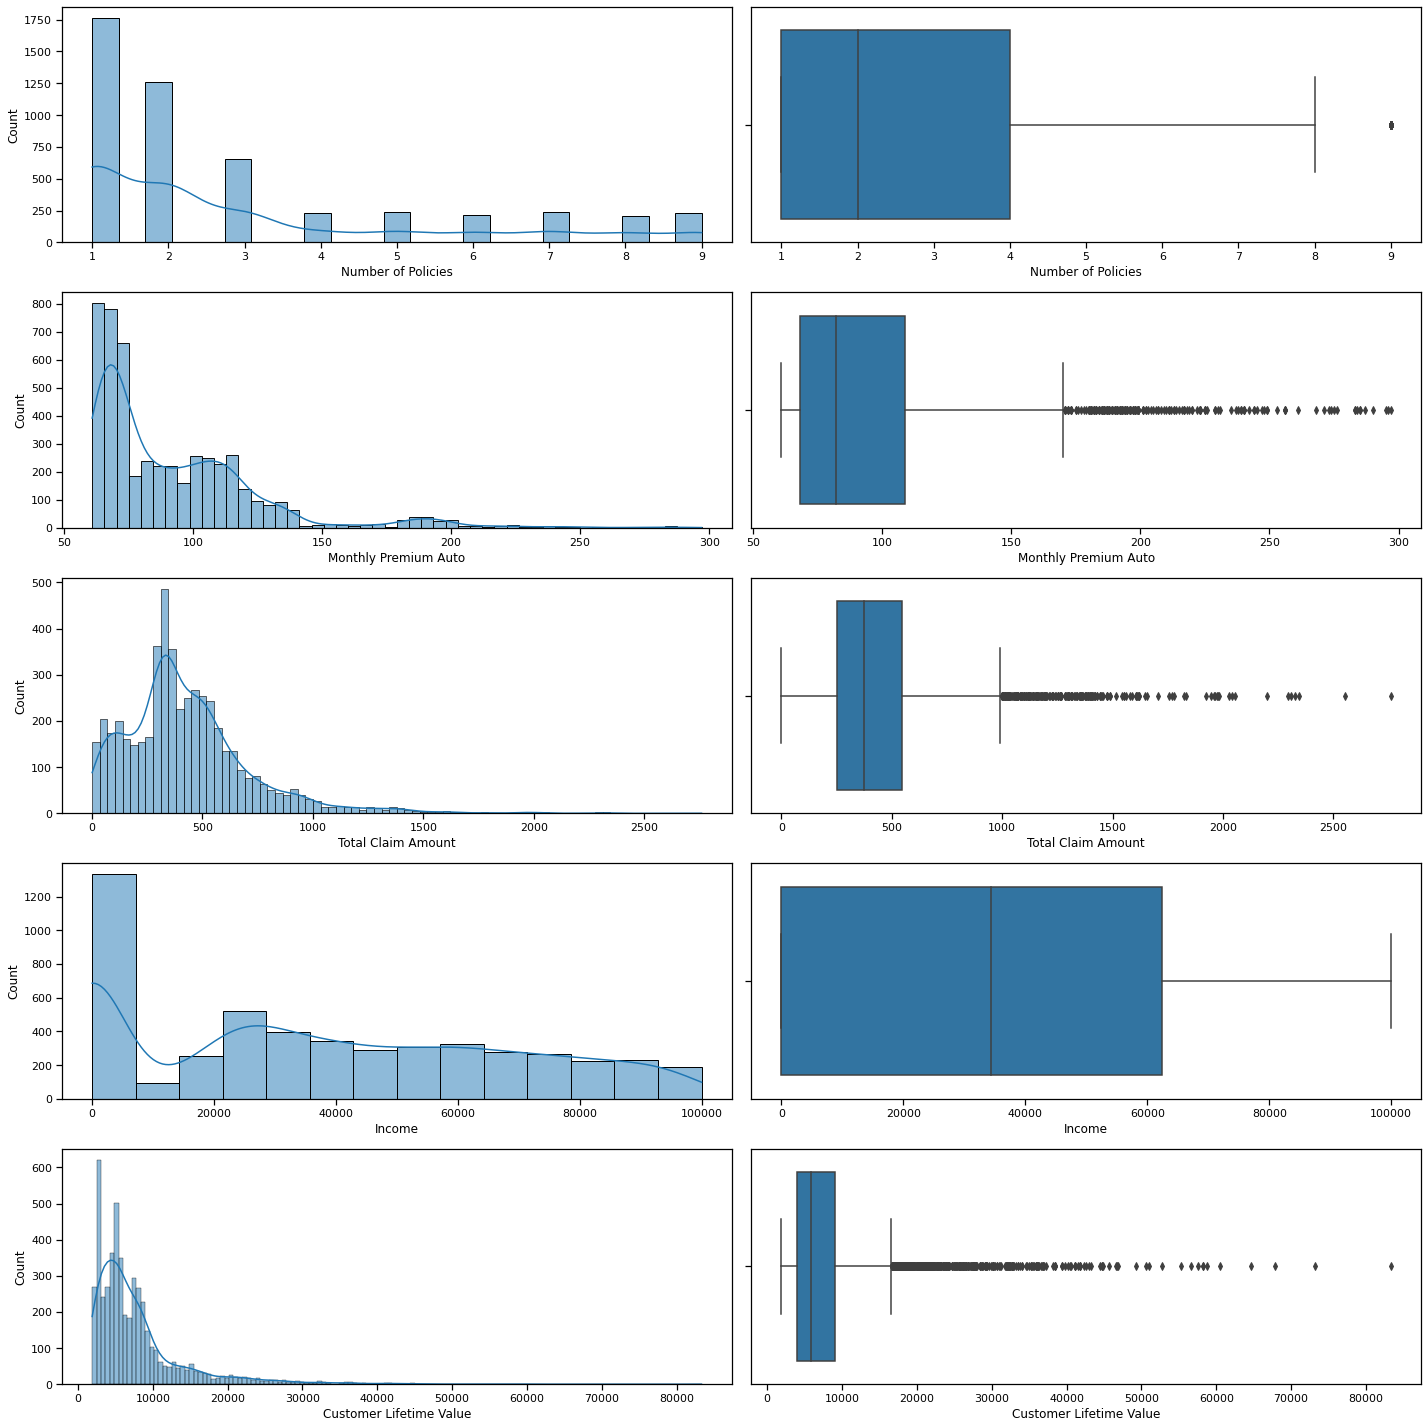

In [605]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

for i, var in enumerate(num_features):
    sns.histplot(x=var, data=df, ax=axes[i, 0], kde=True)
    sns.boxplot(x=var, data=df, ax=axes[i, 1])

plt.tight_layout()
plt.show()

#### - Income

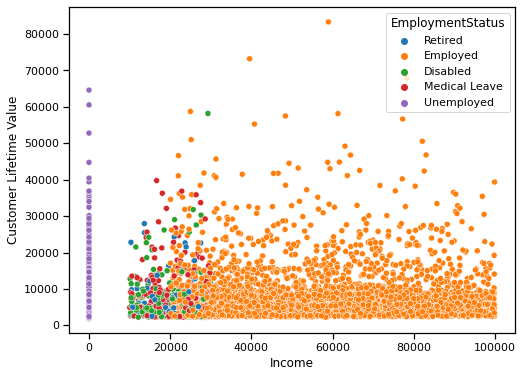

In [606]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Income'],df['Customer Lifetime Value'],hue=df['EmploymentStatus'])
plt.show()

#### - Number of Policies and Monthly Premium Auto

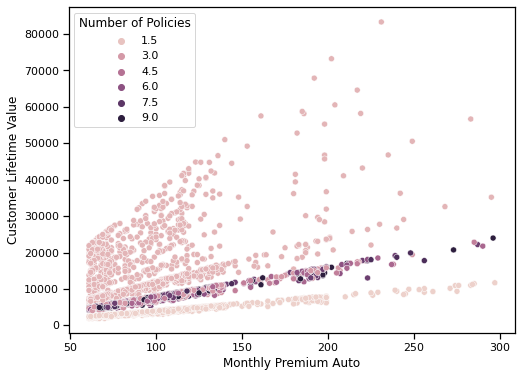

In [607]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Monthly Premium Auto'],df['Customer Lifetime Value'],hue=df['Number of Policies'])
plt.show()

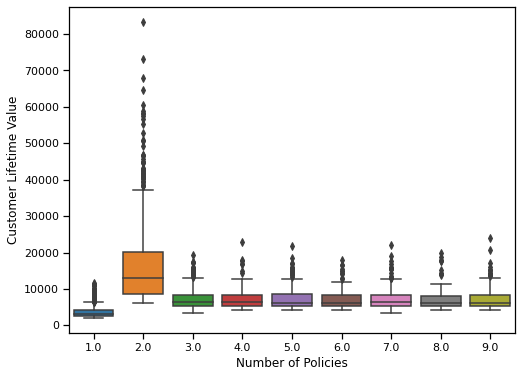

In [608]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Number of Policies'],df['Customer Lifetime Value'])
plt.show()

#### - Total Claim Amount and Monthly Premium Auto

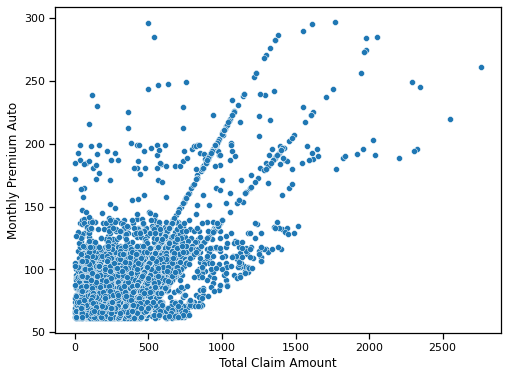

In [609]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Total Claim Amount'],df['Monthly Premium Auto'])
plt.show()

#### - Correlation

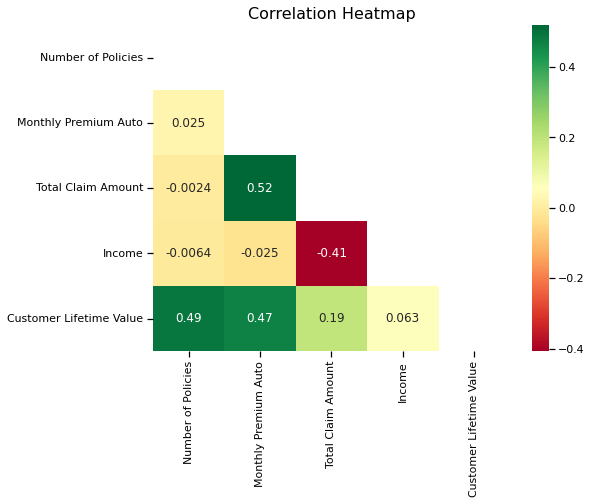

In [610]:
corr_spearman(df)

From the results of the correlation between the numerical features and the target, it can be seen that there is no strong correlation, so it can be assumed that these features do not greatly affect the *Customer Lifetime Value*.

## 2. Categorical Features

In [611]:
cat_features = df.select_dtypes(include=[np.object]).columns
df[cat_features].describe()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


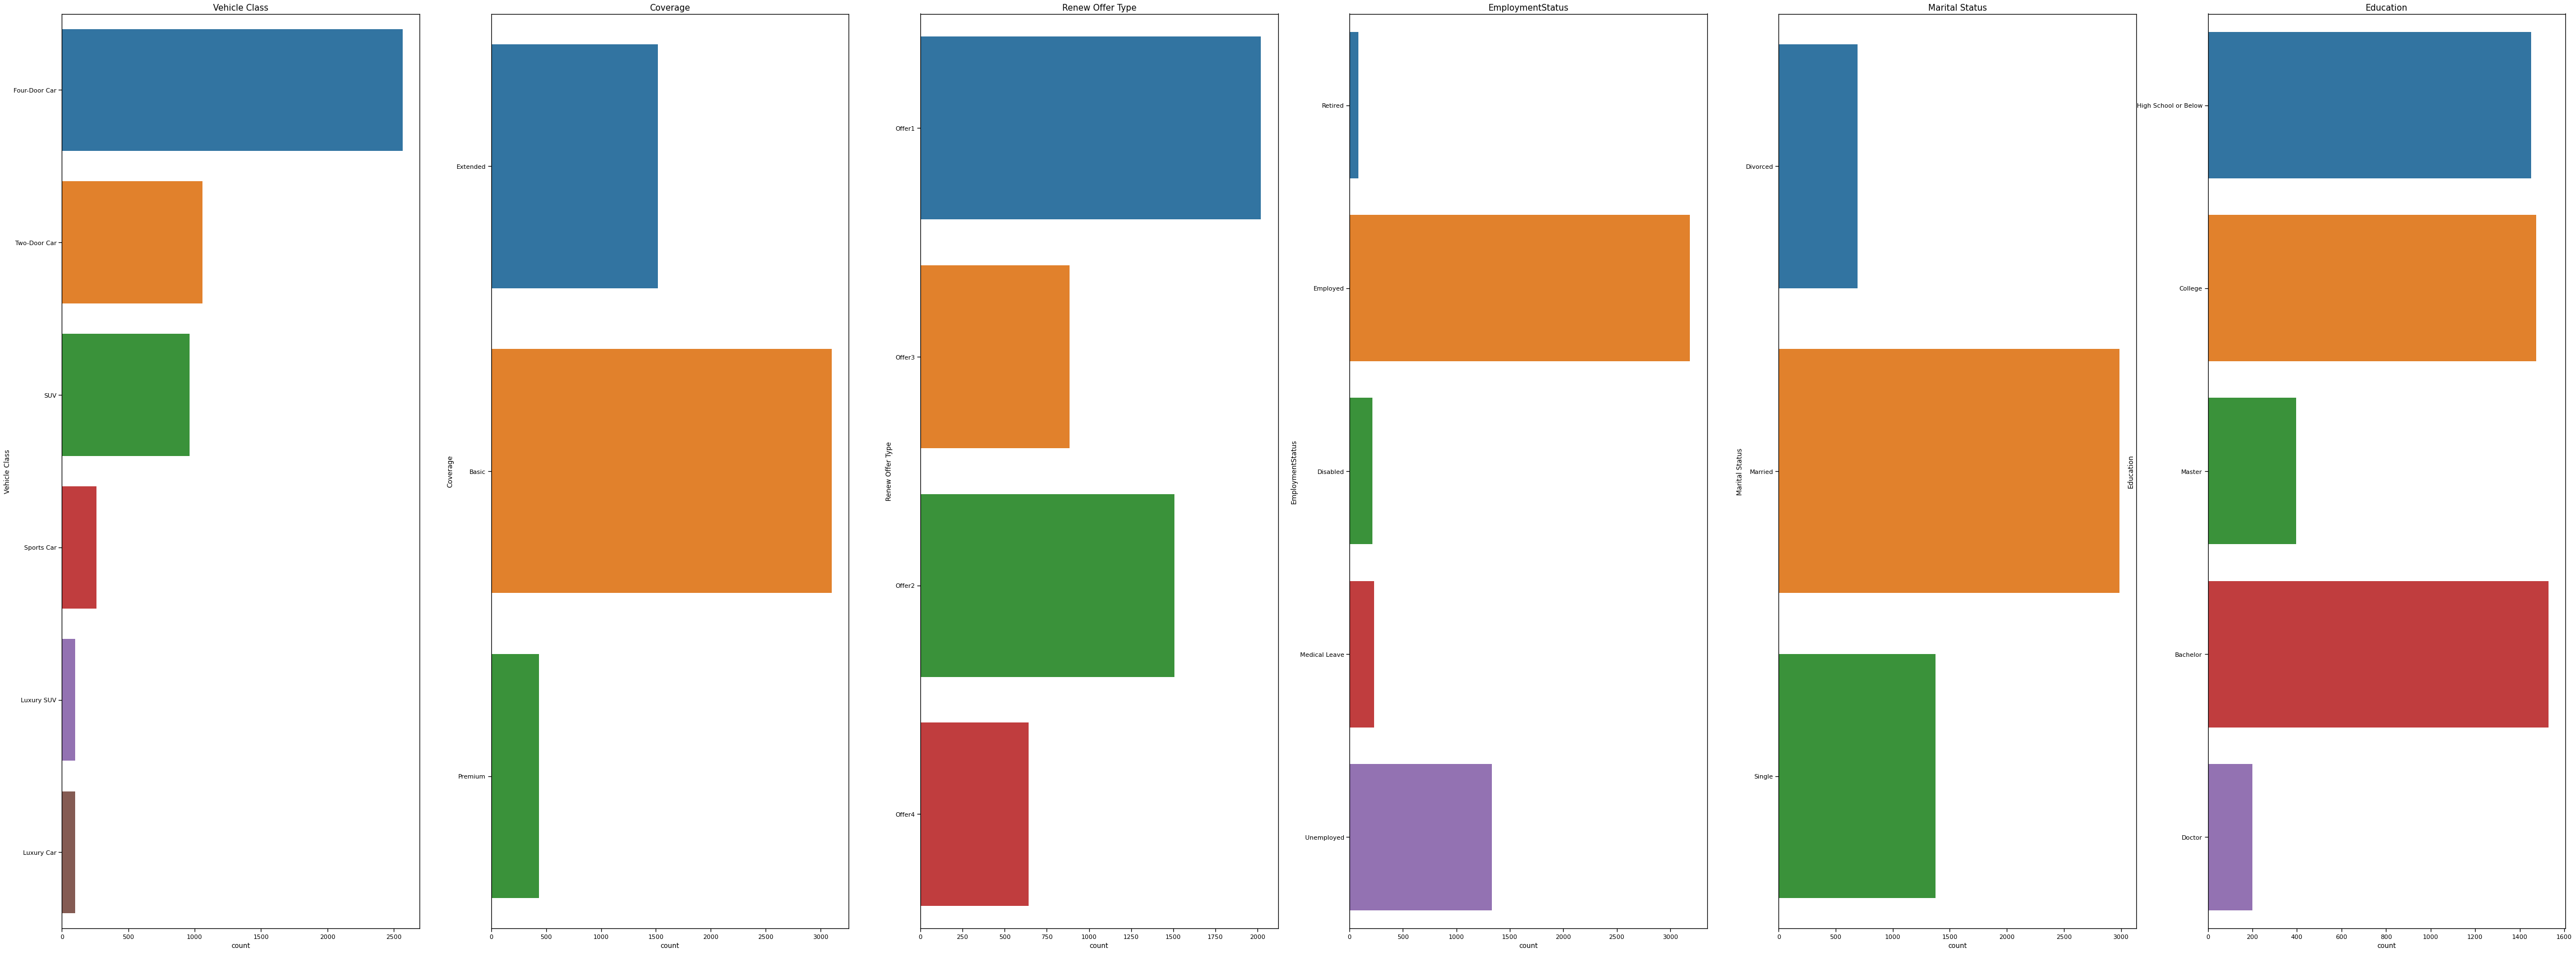

In [612]:
fig, axes = plt.subplots(1, 6, figsize=(80, 30))

for i, var in enumerate(cat_features):
    sns.countplot(y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var}', fontsize=15)
plt.show()

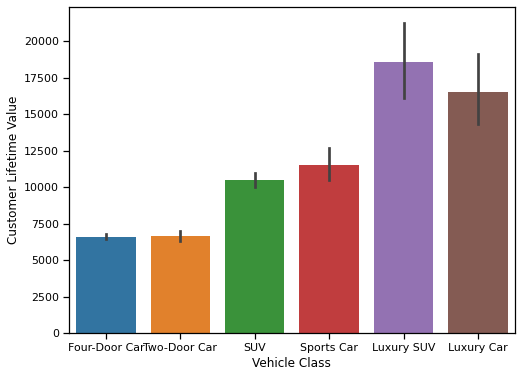

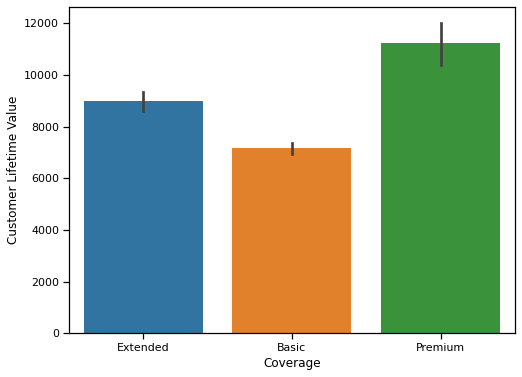

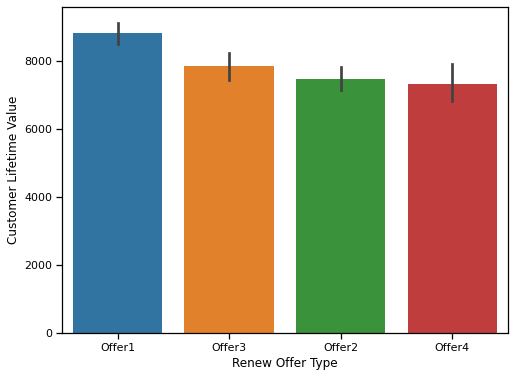

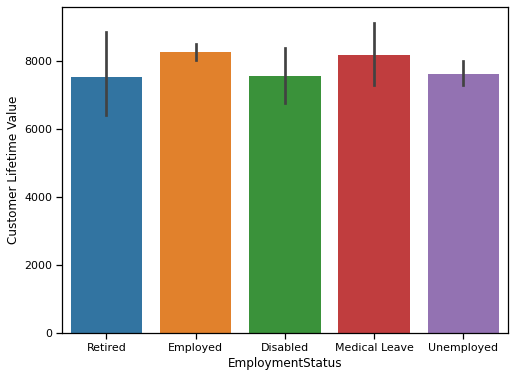

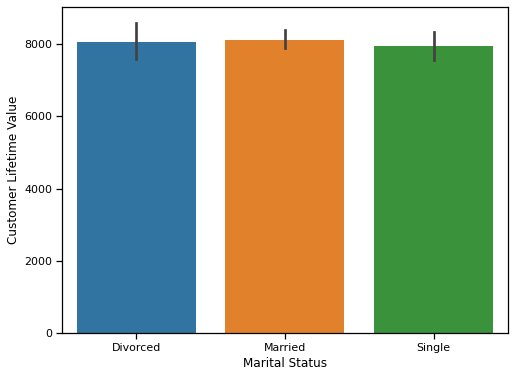

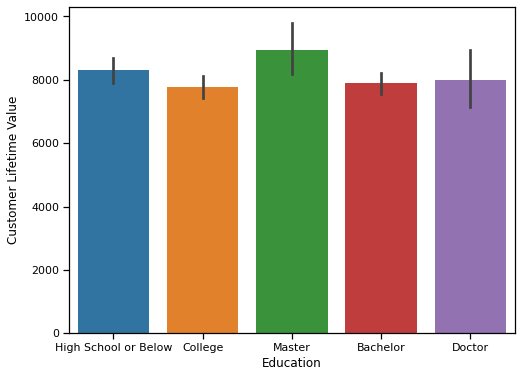

In [613]:
for i in cat_features:
    plt.figure(figsize=(8,6))
    sns.barplot(x=df[i], y=df['Customer Lifetime Value'])
    plt.show()

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,5733.213979,14929.619370,15417.68220,8736.501241,9075.768214,5445.373289
Offer2,4947.264896,14032.593760,14472.58300,8271.189967,8759.592518,5140.909692
Offer3,5342.762550,15169.934505,14040.30523,8586.662939,8392.618913,5257.241485
Offer4,4982.146532,14167.081560,15485.80378,8253.266591,8000.545061,4744.967459


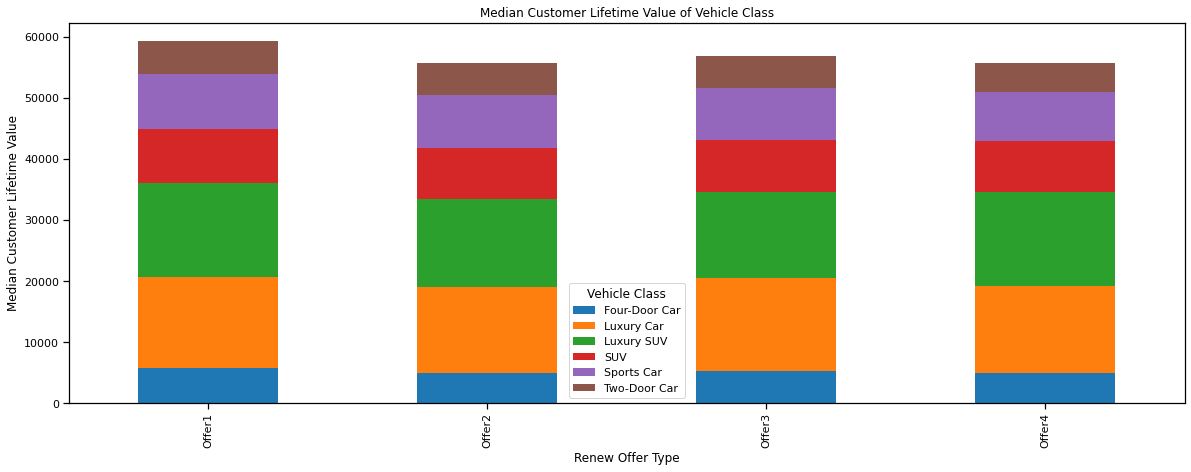

In [614]:
# Plot the median Customer Lifetime Value for each type of Vehicle Class in each Renew Offer Type
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Renew Offer Type', columns='Vehicle Class', values='Customer Lifetime Value', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(20, 7))
pivot_plot.set_xlabel('Renew Offer Type')
pivot_plot.set_ylabel('Median Customer Lifetime Value')
pivot_plot.set_title('Median Customer Lifetime Value of Vehicle Class');

## 3. Anomalies Handling

From the exploration and visualization of the data in the previous session, it can be concluded that both numerical and categorical features do not have strong direct implications for the target. Assuming that there is an error in the data taken by either the Data Collection or the Engineer at PT. X, we can manipulate the outliers data on the target to make the model more optimal and avoid model bias.

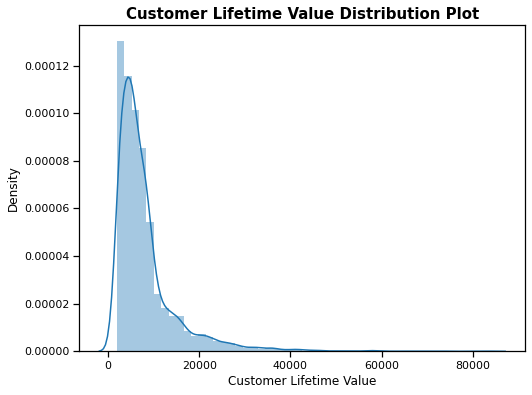

In [615]:
plt.figure(figsize=(8,6))
sns.distplot(df['Customer Lifetime Value'])
plt.title('Customer Lifetime Value Distribution Plot', size=15, weight='bold')
plt.show()

Based on the description of the data and the distribution plot of the Customer Lifetime Value above, it can be seen that 75% of the data in the *Customer Lifetime Value* column is worth less than the range of 9000, while the maximum value is 83325.38. Of course there is a skewness in the distribution, namely the tail that extends to the right (positive skewness). There are 449 data whose *Customer Lifetime Value* is greater than the upper limit based on the IQR method. Therefore, data that has a *Customer Lifetime Value* greater than 16625 (IQR Upperbound) will not be included in the modeling, so the skewness will also be reduced. This will certainly be a limitation for the model that will be built later.

In [616]:
df[df['Customer Lifetime Value']>16625]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
11,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,2.0,66.0,227.446260,35624.0,19237.77089
31,SUV,Basic,Offer1,Employed,Married,Bachelor,2.0,107.0,513.600000,66550.0,25674.14895
37,Four-Door Car,Basic,Offer2,Employed,Married,High School or Below,2.0,69.0,331.200000,44685.0,24723.18311
38,Four-Door Car,Basic,Offer3,Employed,Married,Bachelor,2.0,71.0,389.636991,78804.0,25763.41423
46,Four-Door Car,Extended,Offer2,Employed,Divorced,Bachelor,2.0,89.0,395.729716,33806.0,27789.69235
...,...,...,...,...,...,...,...,...,...,...,...
4983,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,2.0,72.0,345.600000,30915.0,16727.77186
4986,SUV,Basic,Offer2,Employed,Married,Master,2.0,119.0,222.032326,59349.0,43026.52149
4997,Four-Door Car,Extended,Offer2,Employed,Married,High School or Below,2.0,83.0,398.400000,24631.0,26413.54751
5027,SUV,Extended,Offer1,Unemployed,Single,Bachelor,2.0,127.0,609.600000,0.0,18269.53692


In [617]:
449/5051

0.08889328845773115

It can be seen that there are about 8.89% of the total data that we will drop. As a Data Scientist, I set a standard that a maximum of 10% of the total data is the upper limit that may be dropped.

From the IQR method and also the domain knowledge, the resulting model is only limited to predicting new listings whose values are in the data range based on this 'clean dataset' only. Outside the data range, the prediction results from the model will be biased.

In [618]:
dfmodel = df.copy()

In [619]:
dfmodel = dfmodel[(dfmodel['Customer Lifetime Value'] < 16625)].reset_index().drop(columns='index')

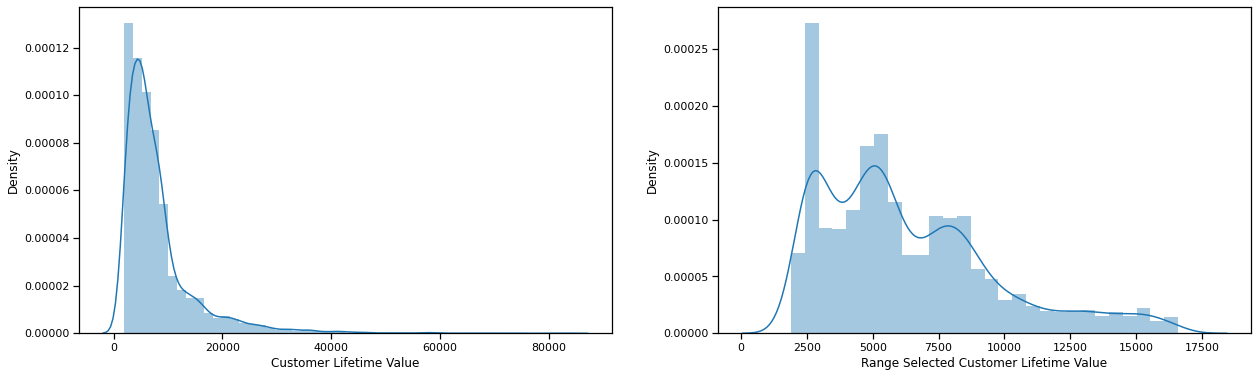

In [620]:
# Data distribution plot before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(dfmodel['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value');

## 4. Cleaned Data Information

In [621]:
# Check more detailed info for each feature
listItem = []

for col in dfmodel.columns:
    listItem.append([col, dfmodel[col].dtype, dfmodel[col].isna().sum(), round((dfmodel[col].isna().sum()/len(dfmodel[col]))*100, 2),
                    dfmodel[col].nunique(), list(dfmodel[col].drop_duplicates().sample(2).values)]);

dfmodel_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfmodel_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Two-Door Car, Sports Car]"
1,Coverage,object,0,0.0,3,"[Extended, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer2, Offer1]"
3,EmploymentStatus,object,0,0.0,5,"[Unemployed, Employed]"
4,Marital Status,object,0,0.0,3,"[Single, Divorced]"
5,Education,object,0,0.0,5,"[High School or Below, Doctor]"
6,Number of Policies,float64,0,0.0,9,"[8.0, 2.0]"
7,Monthly Premium Auto,float64,0,0.0,160,"[87.0, 141.0]"
8,Total Claim Amount,float64,0,0.0,2979,"[489.411833, 704.768111]"
9,Income,float64,0,0.0,3309,"[31911.0, 16483.0]"


---
# **FEATURES SELECTION**

Use dummy features temporary to help us select the features that will be used in the model.

In [622]:
df_dummy = pd.get_dummies(dfmodel, columns = ['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Marital Status','Education'], drop_first=True)

In [623]:
df_dummy_features = df_dummy.drop(columns=['Customer Lifetime Value'])
df_dummy_target = df_dummy['Customer Lifetime Value']

In [624]:
sm_lm = sm.OLS(df_dummy_target, sm.add_constant(df_dummy_features))
result = sm_lm.fit()
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.306
Model:                                 OLS   Adj. R-squared:                  0.302
Method:                      Least Squares   F-statistic:                     84.03
Date:                     Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                             13:00:36   Log-Likelihood:                -43002.
No. Observations:                     4602   AIC:                         8.605e+04
Df Residuals:                         4577   BIC:                         8.621e+04
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [625]:
calc_vif(df_dummy_features).sort_values('VIF',ascending=False)

,Feature,VIF,Acceptable
1,Monthly Premium Auto,62.842726,No
14,EmploymentStatus_Employed,16.665145,No
3,Income,7.676539,No
2,Total Claim Amount,7.184132,No
17,EmploymentStatus_Unemployed,6.895739,No
18,Marital Status_Married,5.341032,No
6,Vehicle Class_SUV,3.925096,Yes
19,Marital Status_Single,3.309903,Yes
4,Vehicle Class_Luxury Car,2.587984,Yes
0,Number of Policies,2.563748,Yes


By *VIF Score* and *Significance Value*, we may drop `Monthly Premium Auto`, `Total Claim Amount`, `EmploymentStatus`, `Marital Status`

In [626]:
df_dummy_new_features = df_dummy_features.drop(columns=['Monthly Premium Auto','Total Claim Amount','EmploymentStatus_Employed','EmploymentStatus_Medical Leave','EmploymentStatus_Retired','EmploymentStatus_Unemployed'])

In [627]:
sm_lm = sm.OLS(df_dummy_target, sm.add_constant(df_dummy_new_features))
result = sm_lm.fit()
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.299
Model:                                 OLS   Adj. R-squared:                  0.296
Method:                      Least Squares   F-statistic:                     108.5
Date:                     Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                             13:00:36   Log-Likelihood:                -43025.
No. Observations:                     4602   AIC:                         8.609e+04
Df Residuals:                         4583   BIC:                         8.621e+04
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [628]:
calc_vif(df_dummy_new_features).sort_values('VIF',ascending=False)

,Feature,VIF,Acceptable
12,Marital Status_Married,3.753109,Yes
1,Income,2.525313,Yes
0,Number of Policies,2.294922,Yes
13,Marital Status_Single,2.011256,Yes
16,Education_High School or Below,1.794669,Yes
14,Education_College,1.793073,Yes
9,Renew Offer Type_Offer2,1.792945,Yes
7,Coverage_Extended,1.432126,Yes
10,Renew Offer Type_Offer3,1.411742,Yes
6,Vehicle Class_Two-Door Car,1.370722,Yes


| From VIF score above, we may conclude that features that will be used in our model are; `Number of Policies`, `Income`, `Vehicle Class`, `Coverage`, `Renew Offer Type`, `Education`, `Marital Status` |
| --- |

---
# **DATA PREPROCESSING**

## Preprocessing Scheme



1. One Hot Encoding     : *Vehicle Class*, *Coverage*, *Renew Offer Type*, *Marital Status*
2. Ordinary Encoding    : *Education*
3. Robust Scaling       : *Number of Policies*, *Income*

*) NB: `Customer Lifetime Value` as a target.

In order to use all the selected features, the categorical features must be converted to numerical features. We can use *ColumnTransformer* to change its data type, which can later be applied to the model pipeline.

In [629]:
# Transforming, convert categorical features into numerical and scalling the numerical with robust scaler.

## Ordinal Encode
ordinal_mapping = [
    {'col':'Education',
    'mapping':{'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4}}
    ]

## Transformer
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Marital Status']),
    ('Ordinal', ce.OrdinalEncoder(cols = 'Education', mapping = ordinal_mapping), ['Education']),
    ('Scaler', RobustScaler(), ['Number of Policies', 'Income'])
], remainder='passthrough')

In [630]:
# Define X and y

X = dfmodel[['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Marital Status', 'Education', 'Number of Policies', 'Income']]
y = dfmodel['Customer Lifetime Value']

---
# **MODELLING**

## Train and Test Splitting

In [631]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

## Residual Analysis

**Assumptions Checking for Linearity:**

1. **Linear relationship:** There is a linear relationship between the independent variable (X) and the dependent variable (y).

2. **Normality:** Residuals of the model are normally distributed.

3. **Independence:** Residuals are independent or have no correlation with other residuals.

4. **Homoscedasticity:** Residuals have a constant variance.

### 1. Linear Relationship

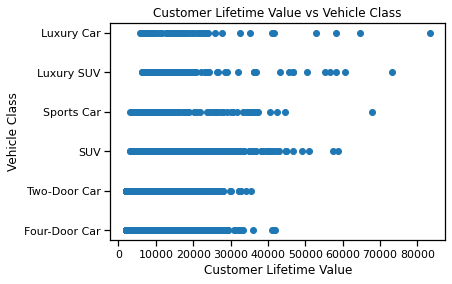

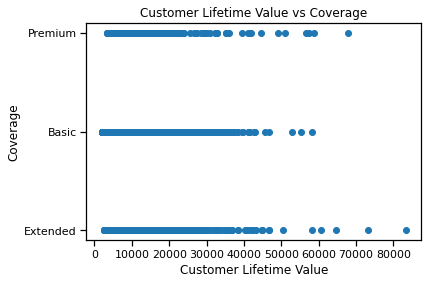

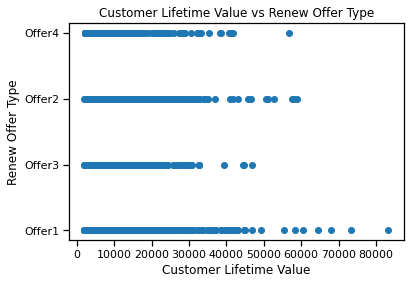

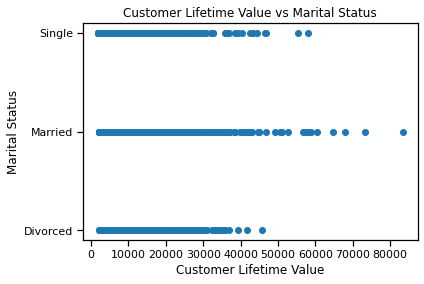

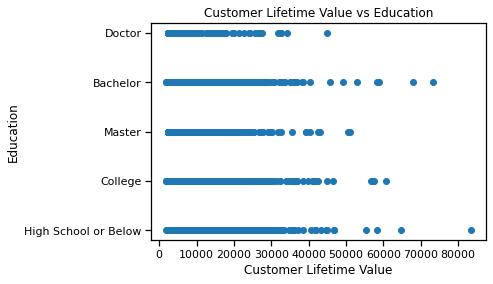

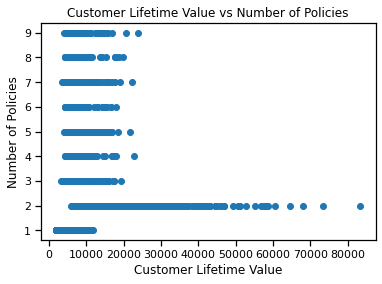

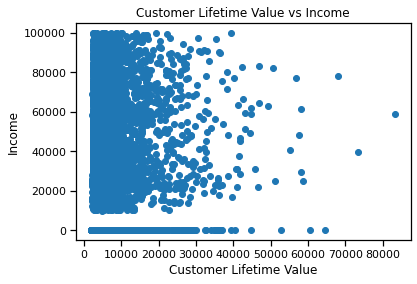

In [632]:
x_col = 'Customer Lifetime Value'
y_columns = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Marital Status', 'Education', 'Number of Policies', 'Income']

for y_col in y_columns:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[x_col], df[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    plt.show()

There is no linear relationship between the independent and target variables.

### 2. Normality

In [633]:
df_dummy

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,...,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Education_College,Education_Doctor,Education_High School or Below,Education_Master
0,2.0,90.0,571.479602,11828.0,10083.486880,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,6.0,62.0,114.514440,44762.0,4943.386117,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,2.0,62.0,257.248789,21514.0,11981.984810,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3,1.0,116.0,556.800000,17913.0,4550.856045,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,62.0,355.820799,19030.0,2372.155492,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,2.0,69.0,446.084760,30595.0,8114.409136,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4598,1.0,74.0,532.800000,0.0,2442.216651,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4599,2.0,109.0,523.200000,27778.0,12904.943360,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4600,1.0,62.0,44.780402,84658.0,2447.053134,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Scaling data for linear model,

In [634]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_dummy)
df_scaled = pd.DataFrame(df_scaled, columns=df_dummy.columns)

Create an OLS model,

In [635]:
fitur_dummy = df_scaled.columns.drop('Customer Lifetime Value')

In [636]:
fitur = fitur_dummy
target = 'Customer Lifetime Value' 
sm_lm = sm.OLS(df_scaled[target], sm.add_constant(df_scaled[fitur]))
result = sm_lm.fit()

In [637]:
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.306
Model:                                 OLS   Adj. R-squared:                  0.302
Method:                      Least Squares   F-statistic:                     84.03
Date:                     Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                             13:00:38   Log-Likelihood:                -4330.8
No. Observations:                     4602   AIC:                             8712.
Df Residuals:                         4577   BIC:                             8872.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Plot residuals,

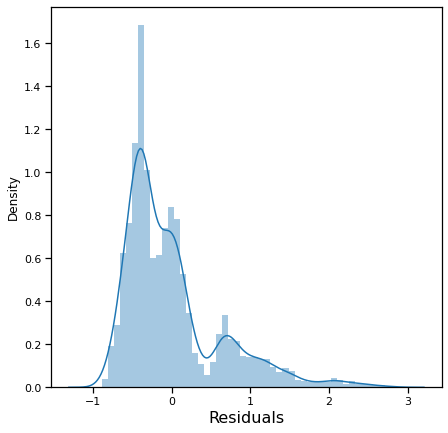

In [638]:
plt.figure(figsize=(7, 7))
sns.set_context('notebook', font_scale=1)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize=16);

In [639]:
# Skewness check
result.resid.skew()

1.519919727921069

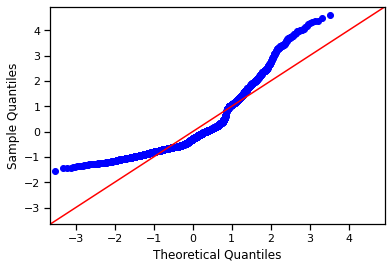

In [640]:
sm.qqplot(result.resid, line='45', fit=True);

From the histogram and QQ-plot, it can be seen that the residuals do not follow the normal distribution. After being validated by looking at the magnitude of the skewness value, it turns out that it is true that the residual is skewed, in which the skewness value is 1.5199 (including highly skewed).

### 3. Gauss-Markov (Independence, homoscedasticity)

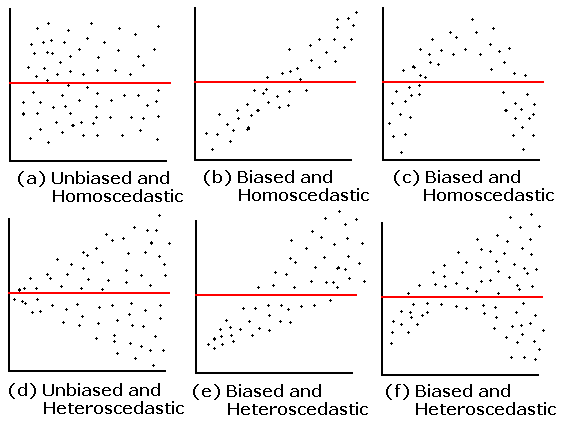

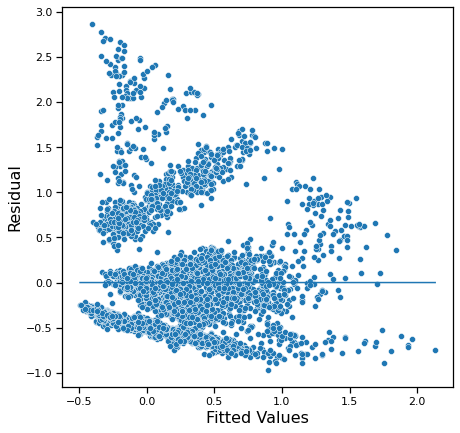

In [641]:
# Gauss-Markov plot
plt.figure(figsize=(7, 7))
sns.set_context('notebook', font_scale=1)
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=16)
plt.ylabel('Residual', fontsize=16);

If it is matched between the Gauss-Markov residuals and the results of the residual plot of the data worked on, it can be said that the residual plot above resembles a biased and heteroscedastic residual form.
*Gauss-Markov* assumption is not fulfilled where Observation of the error terms are uncorrelated with each other and The error term has not constant variance/Non Constant standard deviation.
In other words, residuals are correlated with other residuals and also have heterogeneous variance.

| Since the assumptions of the linear model are not met, non-parametric regression models will be used for further modeling. |
| --- |

## Choose a Benchmark Model (Non-Parametric)

### Model Benchmark

In [642]:
# Define the algorithm used

knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-2826.61422705 -2699.36040612 -3061.44398917 -2654.17058789
 -2957.33467356] KNeighborsRegressor()
[-1912.66909412 -1838.60063953 -2059.95237941 -1784.49691857
 -1921.41481831] KNeighborsRegressor()
[-0.33499658 -0.31752496 -0.32279215 -0.32145779 -0.31999783] KNeighborsRegressor()
[-1437.69602719 -1305.89356594 -1585.94802739 -1280.00302102
 -1444.53031161] DecisionTreeRegressor(random_state=42)
[-712.74748855 -696.04752621 -811.40313447 -660.08280673 -774.16222695] DecisionTreeRegressor(random_state=42)
[-0.09758747 -0.10187777 -0.10607799 -0.09427659 -0.10836459] DecisionTreeRegressor(random_state=42)
[-1160.33810941 -1023.10760589 -1199.42527971 -1072.65971654
 -1210.76811737] RandomForestRegressor(random_state=42)
[-583.36764231 -578.27669092 -645.77079571 -560.62490169 -627.68151131] RandomForestRegressor(random_state=42)
[-0.07948773 -0.08377386 -0.08426261 -0.07784875 -0.08628363] RandomForestRegressor(random_state=42)
[-1170.39940661 -1054.23137735 -1157.02341105 -1142.215677

In [643]:
# Evaluation of the results of the 4 candidate algorithms used
pd.DataFrame({
    'Model': ['KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,KNN Regressor,-2839.784777,153.163885,-1903.426770,93.011820,-0.323354,0.006078
1,DecisionTree Regressor,-1410.814191,110.137342,-730.888637,54.610727,-0.101637,0.005208
2,RandomForest Regressor,-1133.259766,73.381906,-599.144308,32.113881,-0.082331,0.003150
3,XGBoost Regressor,-1139.624812,44.153667,-632.848893,18.261361,-0.092550,0.003059


There is a significant difference between the RMSE and MAE values, where the RMSE value is higher because the residuals or errors are squared before being averaged. This causes RMSE to give a higher 'weight' for large error values. In other words, there are large error values generated by all the algorithms used, so there is a significant difference between the RMSE and MAE values.

Based on RMSE, MAE, and MAPE values, RandomForest Regressor is the best model and is followed by XGBoost Regressor model.

Next, predictions will be made on the test set with the 2 best benchmark models, namely RandomForest and XGBoost.

### Model Performance on Test Set

Prediction on the test set using Random Forest models and XGBoost.

In [644]:
# Benchmark 2 best models
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Predict to test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,1000.548283,575.492263,0.089290
RandomForest,983.356619,535.291842,0.078194


From the metrics resulted by the predictions in the test set, it can be seen that the RandomForest Regressor model is smaller than XGBoost so it can be concluded that the RandomForest Regressor model is the best model for this project.

Next we will focus on tuning to produce a more optimal model with the RandomForest Regressor model.

## Tuning the Model Benchmark

### RANDOM FOREST

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees. To get a better understanding of the Random Forest algorithm, let’s walk through the steps:
1. Pick at random k data points from the training set.
2. Build a decision tree associated to these k data points.
3. Choose the number N of trees you want to build and repeat steps 1 and 2.
4. For a new data point, make each one of your N-tree trees predict the value of y for the data point in question and assign the new data point to the average across all of the predicted y values.

So the reason why it is called a random forest is because we calculate the decision tree several times (200, 300, 400, 500, etc.) to form a forest (small forest).

This technique has a fairly high level of accuracy because it takes the average of many predictions. Thus, this technique can minimize the bias (error).

**Hyperparameter Tuning**

Since the Random Forest Regressor model performs slightly better than XGBoost, we will then use this Random Forest Regressor model as the final model. At this stage, we will perform hyperparameter tuning on the Random Forest Regressor model in the hope of improving model performance.

For Random Forest Regressor model tuning guide, kindly refer to [Tuning Random Forest Regressor](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).

In [645]:
# Hyperparam space Random Forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# 
criterion = ['squared_error', 'absolute_error', 'poisson']

# Create the random grid hyperparameter
hyperparam_space_rf = {
            'model__n_estimators': n_estimators,
            'model__max_features': max_features,
            'model__max_depth': max_depth,
            'model__min_samples_split': min_samples_split,
            'model__min_samples_leaf': min_samples_leaf,
            'model__criterion': criterion
            }


In [646]:
# Algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    cv = crossval,
    n_iter = 50,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 42
)

In [647]:
# Fitting data training to find best parameters
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'Coverage',
                                                                                'Renew '
                                                                                'Offer '
                                              

In [648]:
# View the tuning results in the form of a dataframe. Sorted by RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
1,1.105884,0.029337,0.037611,0.007497,200,10,2,auto,40,squared_error,...,28.579411,2,-0.075755,-0.081127,-0.080925,-0.076894,-0.082817,-0.079504,0.002702,7
46,277.446013,4.046102,0.328856,0.033752,1200,10,1,auto,None,absolute_error,...,30.701639,1,-0.072977,-0.078990,-0.079830,-0.076533,-0.080084,-0.077683,0.002667,1
26,10.551277,0.125635,0.337937,0.015913,1600,5,2,auto,110,squared_error,...,28.593467,4,-0.077225,-0.082060,-0.081891,-0.076795,-0.083564,-0.080307,0.002758,9
10,5.954895,0.151062,0.183126,0.010538,1200,2,4,auto,70,squared_error,...,27.538439,8,-0.077491,-0.083259,-0.081400,-0.077181,-0.083806,-0.080627,0.002805,12
30,8.034088,0.090764,0.237260,0.020694,1200,2,2,auto,None,squared_error,...,27.954844,5,-0.077581,-0.082214,-0.081924,-0.076899,-0.083680,-0.080460,0.002704,10


In [649]:
# Check the best score and params
print('RF')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RF
Best_score: -1077.757794619097
Best_params: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_features': 'auto', 'model__max_depth': 40, 'model__criterion': 'squared_error'}


### Use the Best Estimator to Predict Test Set

Make predictions on the test set using the Random Forest model and selected hyperparameters.

In [650]:
# Model Random Forest Regressor
model = {'RandomForest': RandomForestRegressor(random_state=42)}

# Define model to best estimator
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Save RMSE, MAE & MAPE metrics values after tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())

### Performance Comparison

Comparison of the performance of the Random Forest model before and after hyperparameter tuning.

In [651]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,983.356619,535.291842,0.078194


In [652]:
# After hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,946.226226,519.885104,0.075187


The model has improved performance (reduced RMSE, MAE & MAPE values) with hyperparameter tuning, although only slightly.
- RMSE, MAE & MAPE before tuning    : 983.3566, 535.2918, 0.0781
- RMSE, MAE & MAPE after tuning     : 946.2262, 519.8851, 0.0751

### Visualization of Predicted and the Actual Value

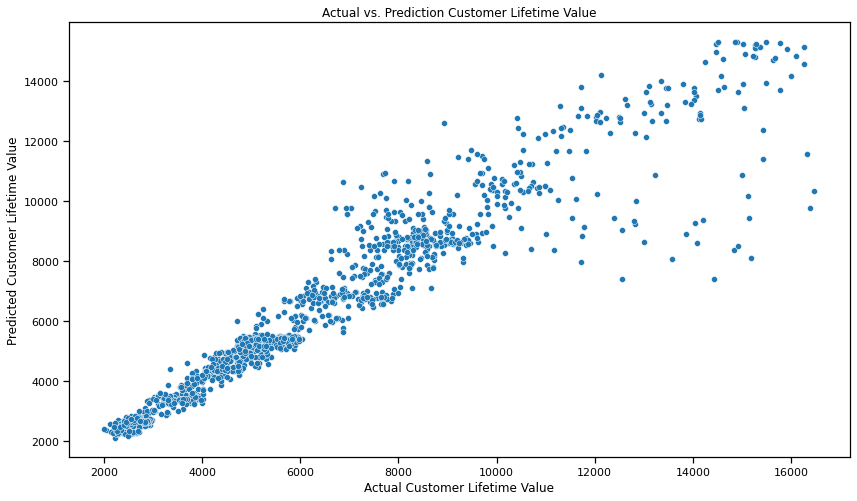

In [653]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction Customer Lifetime Value', 
                                               xlabel='Actual Customer Lifetime Value', 
                                               ylabel='Predicted Customer Lifetime Value');

### Interpretation

By using a non-parametric model, in this case the Random Forest Regressor is the most optimal. We can get pretty good results with an RMSE value of around 946,2262. This means that the model's average prediction for the Customer Lifetime Value target could be around +- 946,2262 from the actual. Of course there are still many ways that can be done to be able to improvise the output model so that it can produce a smaller error value, perform feature selection or set feature importance, use other hyperparameters when tuning, etc.

---
# **CONCLUSION**

The evaluation metrics used in the model are RMSE, MAE & MAPE. If we look at the RMSE value generated by the model after hyperparameter tuning, which is 946,2262, we can conclude that when the model we created is used to estimate Customer Lifetime Value at PT. X is in the range of values as trained on the model (maximum 16625), then the estimated average price will be 946 less than the expected Customer Lifetime Value. However, it is also possible that the prediction will miss even further because the bias generated by the model is still quite high when viewed from the visualization between the actual and predicted prices. The bias generated by this model is due to the lack of features in the dataset that can represent aspects of the lifestyle of each customer, age, type of work and others.

---
# **RECOMMENDATIONS AND IMPROVEMENTS**

Things that can be done to develop the model to be even better, such as:

1. If possible, add more correlative features with the target of *Customer Lifetime Value*, such as lifestyle of each customer, age, type of work and others. In addition, the addition of the latest data for the company will certainly be able to improve the predictive capacity of the model.

2. If you add a lot of data, you can try using more complex models, such as recursive neural networks (RNN), Naïve Bayes, Multivariate Regression (Multilabel), Poisson Regression, etc. However, if the amount of data and features is still like this dataset, it will most likely not change the results significantly.

3. Applying Classification for Customer segmentation by creating two classes (Upper and Lower) by setting a quantity of Customer Lifetime Value for customers who are above the limit and those below the limit.

4. Use polynomial or logarithmic features to create linear models and apply Regularization with Lasso or Ridge

5. Applying Principal Component Regression (PCR) and Partial Least Square (PLS) Regression to overcome multicollinearity.

6. Check which predictions have a high error value. We can group these errors into overestimation and underestimation groups, then choose only the most extreme 5% errors for each group. Later the grouping will be divided into 3 groups, namely overestimation (5%), underestimation (5%), and the majority group whose error is close to the mean value (90%). After that we can check the relationship between the error and each independent variable. In the end, we can actually find out which variables and what aspects cause the model to produce high errors, so we can retrain with the application of other engineering features.

---
# **SAVE AND DEPLOYMENT MODEL**

In [654]:
# Save model

random_rf.best_estimator_.fit(X,y)
pickle.dump(random_rf.best_estimator_, open('Model_Customer_Lifetime_Value_RF.sav', 'wb'))

In [655]:
# Load model

filename = 'Model_Customer_Lifetime_Value_RF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## Predict a Sampling Observation

In [656]:
df_predict = pd.DataFrame({
    'Vehicle Class':['Luxury SUV'],
    'Coverage':['Extended'],
    'Renew Offer Type':['Offer1'],
    'Marital Status':['Married'],
    'Education':['Master'],
    'Number of Policies':[5],
    'Income':[20000]
})

print('Predicted Customer Lifetime Value:', loaded_model.predict(df_predict))

Predicted Customer Lifetime Value: [15654.92163287]


---
---